Regression: Simple Linear 

Dataset: advertising.csv

Apply Data pre-processing (Label Encoding , Data Transformation….) 
techniques if necessary.

Explore whether TV advertising spending can predict the number of sales for 
the product. Also display the regression results and plot the
regression line

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
df = pd.read_csv('advertising.csv')

In [8]:
df.shape

(200, 4)

In [9]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

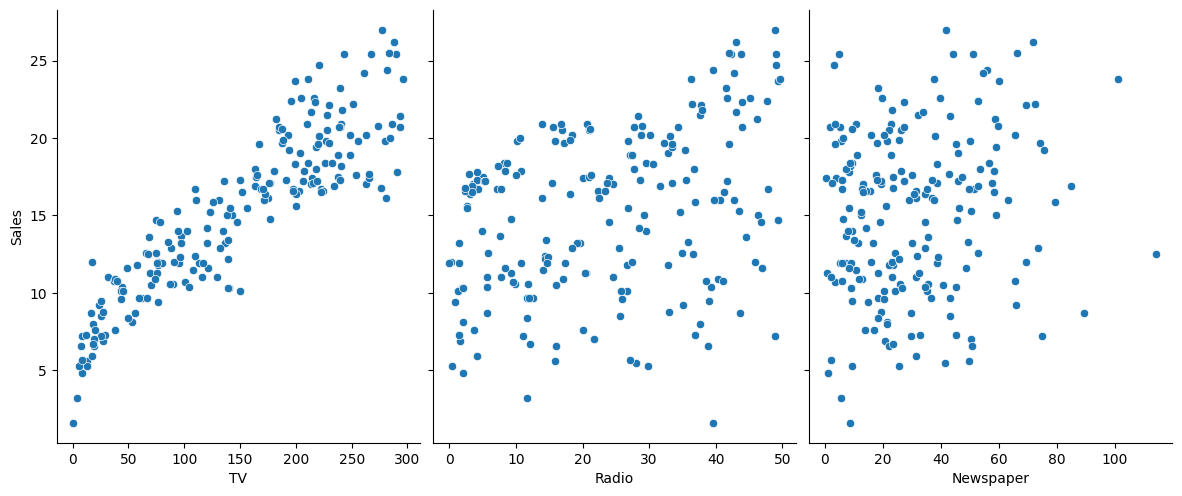

In [11]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.8)
plt.show()

<AxesSubplot:xlabel='Sales'>

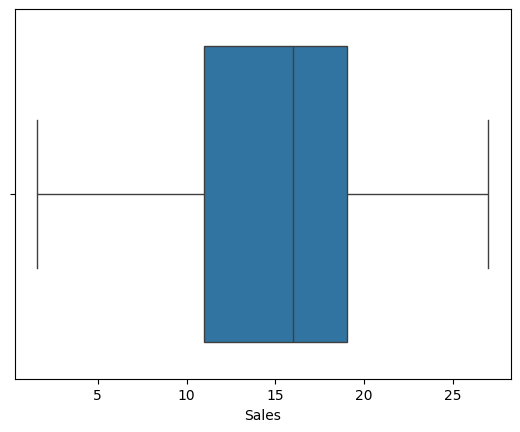

In [12]:
#now to detect outlier we will use seaborn boxplot
sns.boxplot(x=df['Sales'])

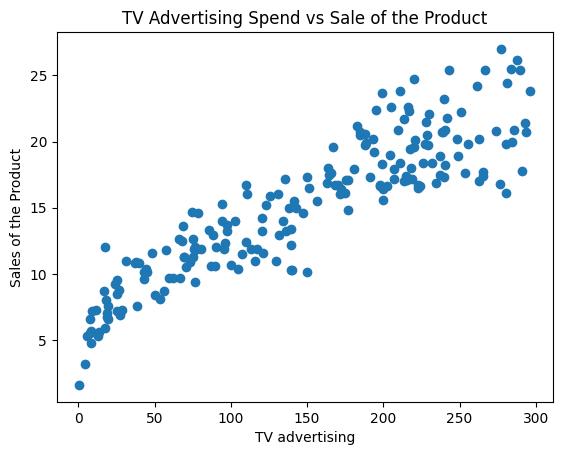

In [13]:
#as we can see there are no outliers in the data
#now lets visualize the data of tv advertise spending vs sale of the product
plt.scatter(df['TV'],df['Sales'])
plt.title('TV Advertising Spend vs Sale of the Product')
plt.xlabel('TV advertising')
plt.ylabel('Sales of the Product')
plt.show()

In [14]:
# now the feature variable is tv and target variable is sales 

X = df[['TV']]
y = df['Sales']

#now split the data into train test split 

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [16]:
#now train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#making predictions
y_pred = model.predict(X_test)

In [18]:
coefficient = model.coef_
intercept = model.intercept_

mse = metrics.mean_squared_error(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
r2score = metrics.r2_score(y_test,y_pred)
rss = ((y_test - y_pred)**2).sum()


# Display coefficients and intercept
print(f"Coefficients: {coefficient}")
print(f"Intercept: {intercept}")

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Residual Sum of Squares: {rss}")
print(f"R-Squared Score: {r2score}")


Coefficients: [0.05548294]
Intercept: 7.007108428241848
Mean Squared Error: 6.101072906773963
Mean Absolute Error: 1.9502948931650088
Residual Sum of Squares: 244.04291627095853
R-Squared Score: 0.802561303423698


In [19]:
model.score(X_test,y_test)

0.802561303423698

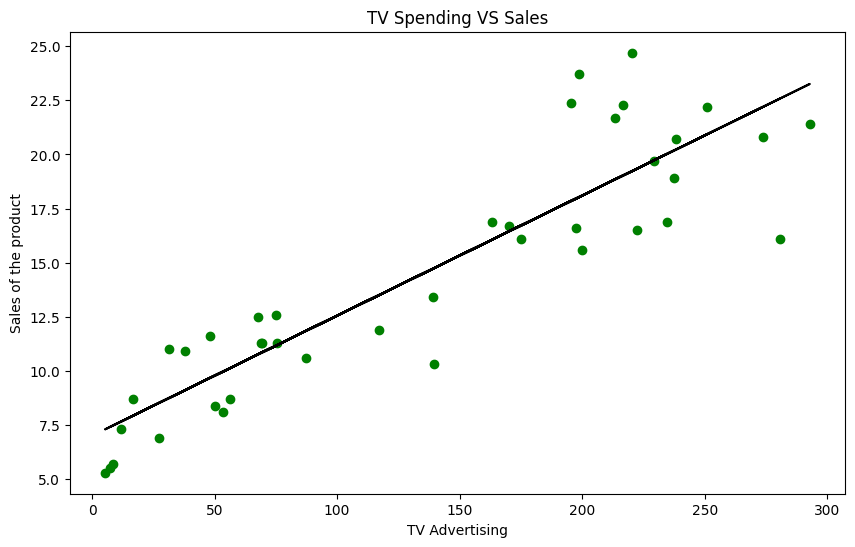

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(X_test,y_test,color="green")
plt.plot(X_test.values,y_pred,color="black")
plt.title("TV Spending VS Sales")
plt.xlabel("TV Advertising")
plt.ylabel("Sales of the product")
plt.show()

In [44]:
newdf = pd.read_csv('advertising.csv')
newdf.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Using Gradient Descent

In [54]:
X = newdf.iloc[:, 0]
Y = newdf.iloc[:, 3]


#initialize parameters
m=0
c=0

learning_rate = 0.0001
epochs = 1000

n=float(len(X))

for i in range(epochs):
    Y_pred = m * X + c
    D_m = (-2/n) * sum(X * (Y - Y_pred))
    D_c = (-2/n) * sum((Y - Y_pred))
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c
    # print(m, c, "\n")

# Print final values of m and c
print("Final values of m and c:", m, c)